# Data inspection

Below we can find the performance results of a mini benchmark [`bench-stat`](https://github.com/janhybs/bench-stat)
which were collected via `ci-hpc` framework.

The benchmark `bench-stat` was executed on a `charon` resource.

## About `bench-stat` application

`bench-stat` application is a set of 3 benchmarks performing simple memory operations in a level 1, level 2 and level 3 cache.

These operations can be extremely fast, thus the experiments are *repeated* `N` times to obtain measurable duration of the benchmarks.

$$N = 1024 * 1024 * reps$$
where $reps$ is a extra repetition coefficient which is altered in all of the commits.

As a baseline commit tagged as `reps-100` was selected, where $reps = 100$.
The total number of repetition for this commit is $N = 1024 * 1024 * 100 = 104\ 857\ 600$

A commits with maximum and minumum number of $reps$ are tagged as `reps-125` and `reps-075` respecively.

## Data structure 

In table below we can see a *simplified* format of the data collected. The most of the fields are self-explanitory
however some of them require explanation:

 - `tag` - a `git` tag of a commit making the results more human-readible
 - `timepoint` - numerical value of a `tag` for further purposes
 - `no` - i-th repetition

In [193]:
%matplotlib inline
from cihpc.exp import exp_02_init as env
env = env.reload(env)
np, sc, pd, plt, sea = env.np, env.sc, env.pd, env.plt, env.sea
df = env.fetch_data()
df.head()

,commit,walltime,time,tag,$tag$,no,walltime_mem_l1,walltime_mem_l2,walltime_mem_l3
0,75d38b25,5.420462,75,reps-075,$reps^{075}$,0,1.358015,1.808600,2.253832
1,75d38b25,5.428641,75,reps-075,$reps^{075}$,1,1.373095,1.766966,2.288569
2,75d38b25,5.359639,75,reps-075,$reps^{075}$,2,1.343519,1.784171,2.231938
3,75d38b25,5.296926,75,reps-075,$reps^{075}$,3,1.343125,1.682919,2.270869
4,75d38b25,5.333107,75,reps-075,$reps^{075}$,4,1.328733,1.763296,2.241055


## Impact of individual commits on a duration

Chart below illustrates relation between `walltime [sec]` and commits, marked as

$$reps^{075}, reps^{080}, \dots, reps^{095}, reps^{097}, reps^{099}, reps^{100}, reps^{101}, reps^{103}, reps^{105}, reps^{110}, \dots, reps^{125}$$

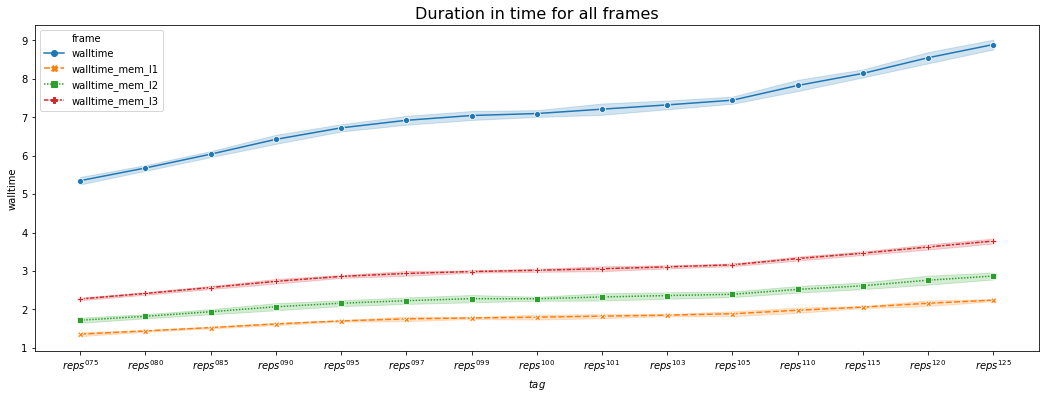

In [194]:
df2 = env.unwrap(df, ['walltime', 'walltime_mem_l1', 'walltime_mem_l2', 'walltime_mem_l3'], 'frame',  'walltime', ['tag', '$tag$'])
plt.figure(figsize=(18, 6))
sea.lineplot(data=df2, x='$tag$', y='walltime', style='frame', hue='frame', markers=True, ci='sd', legend='full')
plt.title('Duration in time for all frames', size=16);

## Data distribution for individual commits

Charts below show histogram for each of the 15 commits along with `normal` fit (gray dashed line)

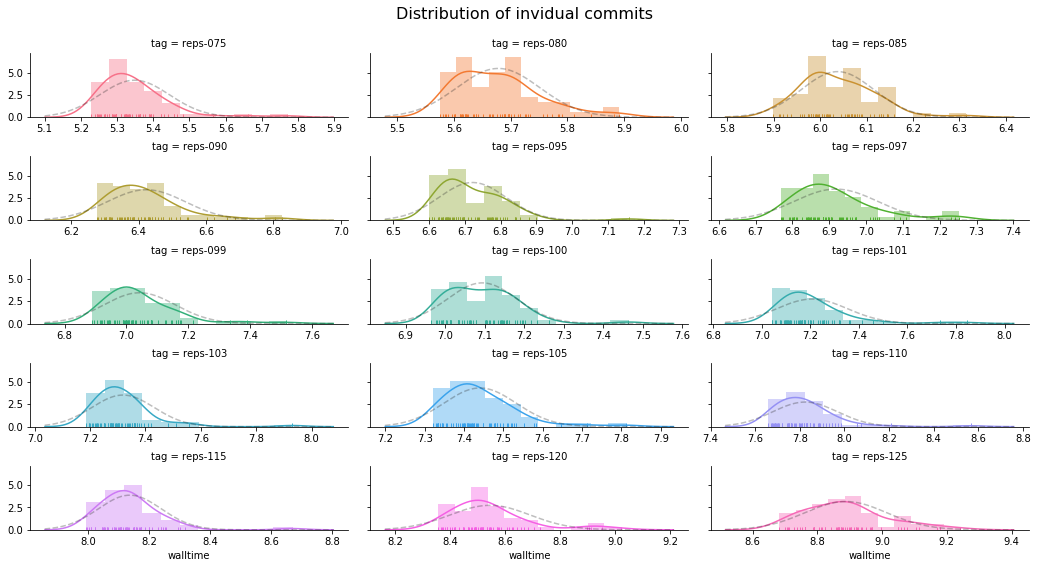

In [195]:
g = sea.FacetGrid(df, col='tag', col_wrap=3, aspect=3, height=1.6, sharex=False, hue='tag')
g.map(sea.distplot, 'walltime', bins=11, rug=True, fit=sc.stats.norm, fit_kws=env.alpha_style(0.3, '--'));
g.fig.suptitle("Distribution of invidual commits", size=16)
g.fig.subplots_adjust(top=.9)

In [186]:
tags = sorted(list(set(df['tag'])))
print(''.join(['%s_{%s}, ' % tuple(x.split('-')) for x in tags]))

reps_{075}, reps_{080}, reps_{085}, reps_{090}, reps_{095}, reps_{097}, reps_{099}, reps_{100}, reps_{101}, reps_{103}, reps_{105}, reps_{110}, reps_{115}, reps_{120}, reps_{125}, 
